# Amazon Product Reviews: Text and sentiment Analysis

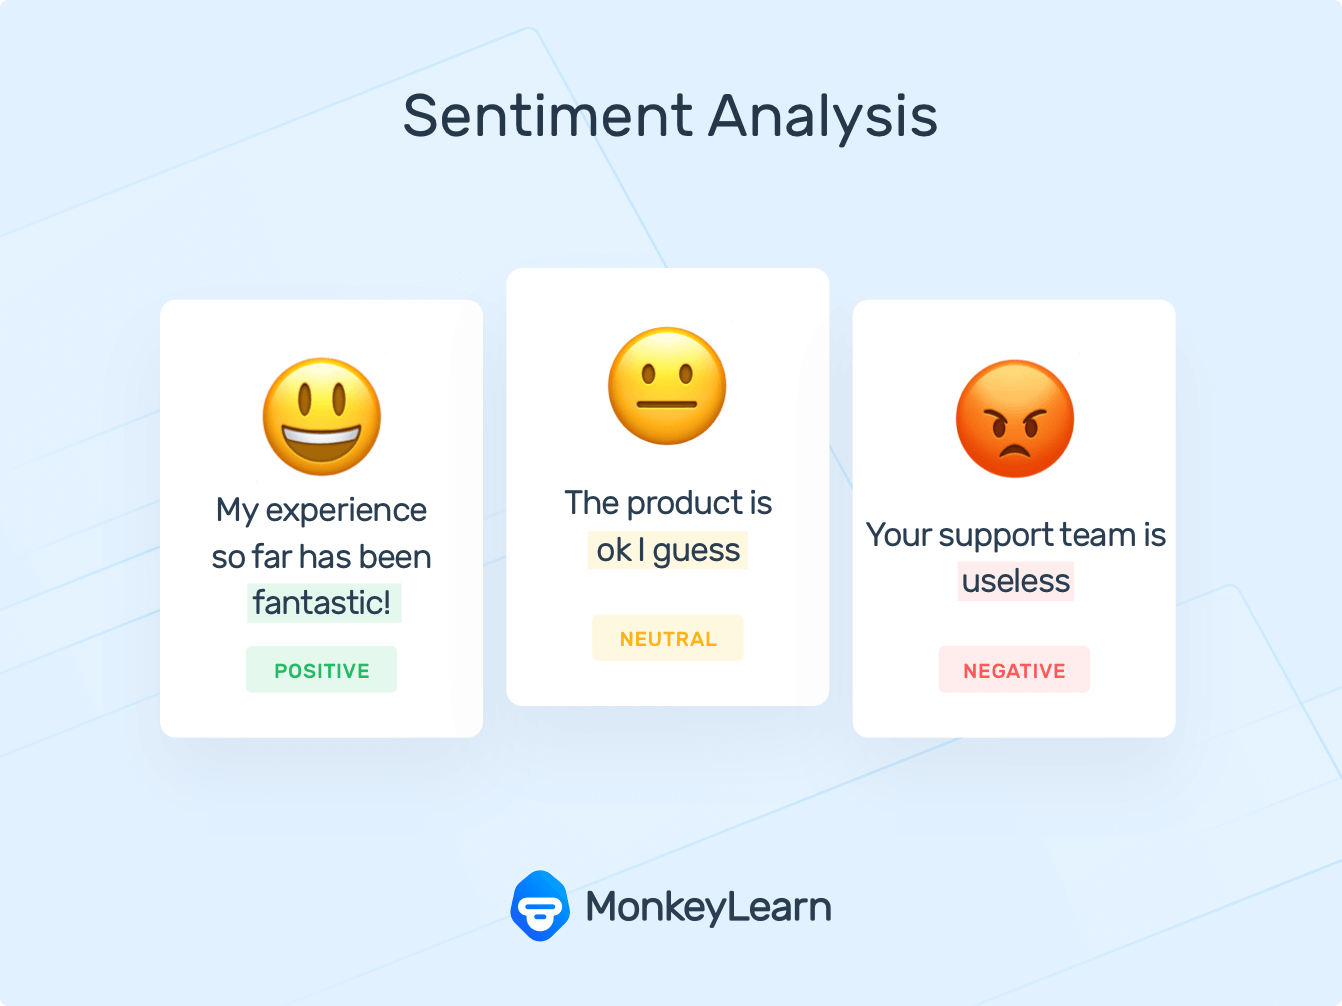

**Objective**:
The objective of this project is to gather product reviews from Amazon through web scraping. After collecting the reviews, we will conduct text analysis and visualization to gain insights into customer opinions and preferences. In addition, we will be implementing twitter-roberta-base-sentiment model for sentiment analysis. The goal is to predict a comprehensive understanding of the sentiments associated with the products.

In [1]:
! pip install requests 
! pip install bs4
! pip install clean-text
! pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 4.2 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.6 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=345e6db1884bd81700b161e7c2861d65bca5bceea3a2a94883d5550a6330036e
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.11.0
    Uninstalling emoji-2.11.0:
      Successfully uninstalled emoji-2.11.0


In [4]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import cleantext
import string
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"
from transformers import BertTokenizer, TFBertModel,TFBertForSequenceClassification
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import seaborn as sns
from tqdm import tqdm
import random
import time
import pandas as pd
import numpy as np
# for data cleaning
import string
import re
# for removing accented and special chracters
import unicodedata
# for stopwords Removal
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
# for calculating Polarity and Subjectivity
from textblob import TextBlob
# function for making ngrams
from nltk.util import ngrams
# load in all the modules we're going to need
import nltk
import collections
# for Wordscloud
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Web scraping the data

In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

HEADERS = {
    "accept-language": "en-GB,en;q=0.9",
    "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15",
    "cookie": "csm-hit=tb:7R3QBMNWE8SYFXDZH8NG+s-XF9JNNT2H1WRDQG8XPN1|1719032135540&t:1719032135540&adb:adblk_no; lc-acbin=en_IN; session-id=262-3584196-0893719; session-id-time=2082787201; session-token=GUa9wnhHx2CXc/5u4+/xGt1K+vSfezkQkGnjBSFU9H3NwPTQWznqaayC0PNB0P1VnxE9zFTpE02ap/foeXzp+g5QV9JfQLavSnBD8+1AJFjaoa8W0600YyYPdlPv6yyZE6c4vEw/MSnMz7GL6AZ+nNOhp0WMm6iqUxCXtkwGAsWqJUpRU4r792pKc1qDugDTfCBZN79fDT4fEUgn+gxm9kI9q/FaAh3f0j6hFRXd7MrCO2fb5RicV0jif5okCxro61ej8p77dW7PZfO2QSzM78/k2py+Qp1+Ke7gqL4zj/Lqxigl0iuKud265FqMLhTuktO4tHmJqVybR1+f6hK+SxXgbIiYUTLePOr163d5aYJjtWczROssJvGWxEsczw7W; i18n-prefs=INR; ubid-acbin=258-0851131-9942451; x-acbin=\"wHLSxB2KChwwnPb6HxWvrQGYE6fY3E9B1@4dViRPaIJ6i?R3AJ7fkKDqiJJj1aMZ\"; at-acbin=Atza|IwEBIA4y3qvs2V7NJj7ZraTh6T_e-aJVbuaZU-sj2tKZpsT4YgkpGMLABjgBHuqJP2CcouOz5T--EDMZebnQN-Hqc70CizSQB2x-oijwQ4c_HVy_oX5T0Gc1aCUhCTSPoZHB5wTtHgVI5LbluQDK8NMJ8Zm80XszMBBUz-rHoIWczUvj7U_lv-Jw7ct_8UhppUjqaOJ2JEvIMNdsHLM7tE5jXodc7-lGwNk7KpibU51tNiGUxA; sess-at-acbin=\"3N5NerSZeKYosEAjuvjxbqtIss2Q/vc8LBpUoutdtU4=\""
}

session = requests.Session()

def get_soup(url):
    r = requests.get(url, headers=HEADERS)
    random_wait = random.random()
    time.sleep(random_wait)    
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

reviewlist = []

def get_reviews(soup):
    reviewlist = []
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.com:Customer reviews:', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'date': soup.find('span', {'data-hook': 'review-date'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass
    return reviewlist

In [16]:
review_page_url = "https://www.amazon.in/JBL-Cancellation-Headphones-Playtime-Assistant/product-reviews/B096FYLJ6M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews" 
sort_by_recent_url = review_page_url.replace("dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews","arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent")
positive_reviews_url = review_page_url.replace("dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews","arp_d_viewopt_sr?ie=UTF8&reviewerType=all_reviews&filterByStar=positive")
negative_reviews_url = review_page_url.replace("dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews","arp_d_viewopt_sr?ie=UTF8&reviewerType=all_reviews&filterByStar=critical")

In [17]:
reviewlist = []
soup = get_soup(review_page_url)
reviewlist.extend(get_reviews(soup))
print(len(reviewlist))
# print(review_page_url)

from tqdm import tqdm

previous_length = 0

for x in tqdm(range(2, 50)):
    url = review_page_url.replace("ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews", f"ref=cm_cr_getr_d_paging_btm_next_{x}?ie=UTF8&reviewerType=all_reviews&pageNumber={x}")
    soup = get_soup(url)
    current_length = len(reviewlist)
    reviewlist.extend(get_reviews(soup))
    
    if len(reviewlist) == current_length:
        break
    
    previous_length = len(reviewlist)
    print(len(reviewlist))

#     print(url)

df = pd.DataFrame(reviewlist)

10


  2%|▏         | 1/48 [00:01<01:15,  1.61s/it]

20


  4%|▍         | 2/48 [00:03<01:26,  1.88s/it]

30


  6%|▋         | 3/48 [00:04<01:05,  1.45s/it]

40


  8%|▊         | 4/48 [00:06<01:05,  1.48s/it]

50


 10%|█         | 5/48 [00:07<00:55,  1.29s/it]

60


 12%|█▎        | 6/48 [00:08<01:00,  1.44s/it]

70


 15%|█▍        | 7/48 [00:09<00:54,  1.34s/it]

80


 17%|█▋        | 8/48 [00:11<00:50,  1.26s/it]

90


 19%|█▉        | 9/48 [00:12<00:51,  1.33s/it]

100


 19%|█▉        | 9/48 [00:13<00:59,  1.53s/it]


# Data Preprocessing

In [ ]:
df.shape

In [ ]:
df['product'] = df['product'].apply(lambda x: x.split(':')[-1])
df['product'] = df['product'].apply(lambda x: x.split('.')[0])
df['product'] = df['product'].apply(lambda x: x.split('|')[0])
df['product'] = df['product'].apply(lambda x: x.split(',')[0])
df['product'] = df['product'].apply(lambda x: x.split('-')[0])
product = df['product'][0]

In [ ]:
df['title'] = df['title'].apply(lambda x: x.split('\n')[1])

In [ ]:
from datetime import datetime
def return_dt(ex_string):
  date = datetime.strptime(ex_string.split("on ")[1], "%d %B %Y").date()
  return date

df['date'] = df['date'].apply(return_dt)
df['date']= pd.to_datetime(df['date'])

In [ ]:
def text_cleaning(text):
  text=text.lower()
  stop = stopwords.words('english')
  text = " ".join([word for word in text.split() if word not in stop])
  text=cleantext.clean(text, no_emoji=True)
  translator = str.maketrans('', '', string.punctuation)
  text=text.translate(translator)
  return text


In [ ]:
df['title'] = df['title'].astype(str)
df['body'] = df['body'].astype(str)
# df['title'] = df['title'].apply(text_cleaning)
# df['body'] = df['body'].apply(text_cleaning) 

In [ ]:
df.head()

# Clean the dataset

In [ ]:
# First lets remove Punctuations from the Reviews
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

df['body'] = df['body'].apply(punctuation_removal)

In [ ]:
# lets make a function to remove Numbers from the reviews
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

df['body'] = df['body'].apply(drop_numbers)

In [ ]:
# lets show the Top 10 Reviews after Removal of Punctuations and Numbers
df['body'].head(10)

In [ ]:
### Removing Accented Characters

"""Accented characters are important elements which are used to signify emphasis on
a particular word during pronunciation or understanding. In some instances, 
the accent mark also clarifies the meaning of a word, which might be different without the accent.
While their use in English is largely limited but there are very good chances 
that you will come across accented characters/letters in a free text corpus. 
Words such as résumé, café, prótest, divorcé, 
coördinate, exposé, latté etc"""
# lets create a function to remove accented characters
def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text

# lets apply the function
df['body'] = df.apply(lambda x: remove_accented_chars(x['body']), axis = 1)

In [ ]:
# Create a function to remove special characters
def remove_special_characters(text):
    pat = r'[^a-zA-z0-9]' 
    return re.sub(pat, ' ', text)
 
# lets apply this function
df['body'] = df.apply(lambda x: remove_special_characters(x['body']), axis = 1)

In [ ]:
df['body'][:10]

# Feature Engineering

In [ ]:
# lets check if the dataset has any Missing Values
df.isnull().sum()

In [ ]:
# Lets calculate the length of the Reviews
df['length'] = df['body'].apply(len)

#### Text Polarity¶

It is the expression that determines the sentimental aspect of an opinion. In textual data, the result of sentiment analysis can be determined for each entity in the sentence, document or sentence. The sentiment polarity can be determined as positive, negative and neutral.

In [ ]:
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    pol = textblob.sentiment.polarity
    return pol

# lets apply the function
df['polarity'] = df['body'].apply(get_polarity)

#### Text Subjectivity¶

In natural language, subjectivity refers to expression of opinions, evaluations, feelings, and speculations and thus incorporates sentiment. Subjective text is further classified with sentiment or polarity.

In [ ]:
# Lets calculate the Subjectvity of the Reviews
def get_subjectivity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    subj = textblob.sentiment.subjectivity
    return subj

# lets apply the Function
df['subjectivity'] = df['body'].apply(get_subjectivity)

In [ ]:
## lets summarize the Newly Created Features
df[['length','polarity','subjectivity']].describe()

In [ ]:
# calculating the Character Count in the Reviews
df['char_count'] = df['body'].apply(len)

In [ ]:
# calculating the Word Count
df['word_count'] = df['body'].apply(lambda x: len(x.split()))

In [ ]:
# Calculating the Word Density
df['word_density'] = df['char_count'] / (df['word_count']+1)

In [ ]:
# importing the List of Punctuations
import string
punctuation = string.punctuation

# Calculating the Punctuation Count
df['punctuation_count'] = df['body'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation)))

In [ ]:
## lets summarize the Newly Created Features
df[['char_count','word_count','word_density','punctuation_count']].describe()

# Data visualization

#### Ratings Distribution

In [ ]:
#   Plotting a bar plot of the distribution of the product ratings.
sample_ratings=df.groupby("rating", sort=False).count() #   Aggregating the number of ratings for each rating value.
sample_ratings=sample_ratings.iloc[:, 0:1]  #   Selecting the first column of the pandas.DataFrame.
sample_ratings.columns=["count"]    #   Renaming the column of the pandas.DataFrame.
sample_ratings=sample_ratings.reset_index() #   Resetting the index of the pandas.DataFrame.

sns.barplot(x="rating", y="count", data=sample_ratings, palette=["#E60049", "#0BB4FF", "#50E991", "#FFA300", "#9B19F5"], edgecolor="black")
plt.title("Distribution of Product Ratings", y=1.02)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

#### Most Frequently Occuring Words

In [ ]:
## Visualizing the Most Frequent Words

from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.body)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 10))
frequency.head(10).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 10")
plt.show()


#### Frequent words in Positive and Negative Reviews

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'df' is your DataFrame and it has columns 'title' and 'rating'
# Generate the text for word clouds
text1 = " ".join(title for title in df[df.rating > 3.0].title)
text2 = " ".join(title for title in df[df.rating < 3.0].title)

# Create the word clouds
word_cloud1 = WordCloud(collocations=False, background_color='white', width=2048, height=1080).generate(text1)
word_cloud2 = WordCloud(collocations=False, background_color='white', width=2048, height=1080).generate(text2)

# Plot the word clouds side by side
plt.figure(figsize=(20, 10))

# Display the first word cloud
plt.subplot(1, 2, 1)
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')

# Display the second word cloud
plt.subplot(1, 2, 2)
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')

plt.show()


# Sentiment Analysis

In [ ]:
Positive_reviews = len(df[df['polarity'] > 0])
Neutral_reviews = len(df[df['polarity'] == 0])
Negative_reviews = len(df[df['polarity'] < 0])

In [ ]:
# Data for the pie chart
labels = ['Positive', 'Neutral', 'Negative']
sizes = [Positive_reviews, Neutral_reviews, Negative_reviews]
colors = sns.color_palette('pastel')[0:3]  # Use a pastel color palette from Seaborn

# Create the pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Add a title
ax.set_title('Categorization of reviews')

# Style the chart using Seaborn's aesthetics
sns.set_style('whitegrid')
sns.despine(left=True, bottom=True)

# Improve the appearance of the text on the pie chart
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('white')

# Show the plot
plt.show()

#### Distribution of polarity and subjectivity

In [ ]:
## Visualizing Polarity and Subjectivity

# Set the figure size and style
plt.rcParams['figure.figsize'] = (12, 6)
sns.set(style='whitegrid')

# Create subplots
fig, axes = plt.subplots(1, 2, sharey=True)

# Plot the distribution of polarity
sns.kdeplot(df['polarity'], ax=axes[0], shade=True, color="b", bw_adjust=0.5)
axes[0].set_title('Distribution of Polarity')
axes[0].set_xlabel('Polarity')
axes[0].set_ylabel('Density')

# Plot the distribution of subjectivity
sns.kdeplot(df['subjectivity'], ax=axes[1], shade=True, color="r", bw_adjust=0.5)
axes[1].set_title('Distribution of Subjectivity')
axes[1].set_xlabel('Subjectivity')

# Add a suptitle for the entire figure
fig.suptitle('Distribution of Polarity and Subjectivity', fontsize=16)

# Adjust the layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Summarizer model

In [ ]:
pos_df = df[df.rating > 4.0]
neg_df = df[df.rating < 3.0]

In [ ]:
pos_body = pos_df['body'].str.cat(sep='. ')
pos_title = pos_df['title'].str.cat(sep='. ')
neg_body = neg_df['body'].str.cat(sep='. ')
neg_title = neg_df['title'].str.cat(sep='. ')
pos_body = pos_body[0:1024]
neg_body = neg_body[0:1024]
pos_title = pos_title[0:1024]
neg_title = neg_title[0:1024]

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

In [ ]:
print(summarizer(pos_title, max_length=130, min_length=30, do_sample=False))

In [ ]:
print(summarizer(neg_title, max_length=130, min_length=30, do_sample=False))